In [ ]:
import pandas as pd
import numpy as np
from numpy.random import default_rng
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error


plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] =  12
plt.style.use('fivethirtyeight')

pd.set_option('display.float_format', lambda x: '%.5f' % x)

paleta = sns.color_palette(sns.color_palette("dark", 5))

# Gerando dados sintéticos

In [ ]:
#população
x_real = np.linspace(0,1,100)
y_real = np.sin(2*np.pi*x_real)

In [ ]:
#Amostra de 20 pontos da população, cada ponto tem um erro associado. Seed para reprodutibilidade
np.random.seed(0) 
x = np.random.choice(np.linspace(0,1,100),20)
y = np.sin(2*np.pi*x) + np.random.randn(20)*0.4
data = pd.DataFrame({'x':x, 'y':y})

In [ ]:
data.head()

,x,y
0,0.444444,0.792146
1,0.474747,0.014403
2,0.646465,-0.307519
3,0.676768,-1.431792
4,0.676768,-0.724644


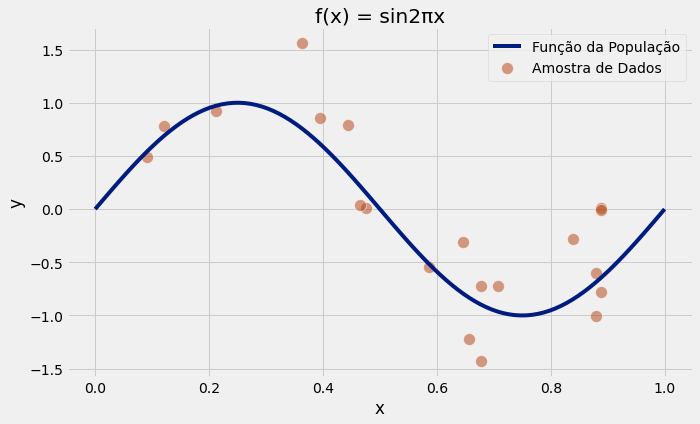

In [ ]:
fig,ax = plt.subplots()
sns.lineplot(x = x_real, y= y_real, ax = ax, color=paleta[0], linestyle='-', marker='', label='Função da População')
sns.scatterplot(data = data, x = 'x', y= 'y', marker = 'o', c = [paleta[1]], label = "Amostra de Dados", alpha = 0.5)
ax.set_title("f(x) = sin2πx");

# Regressão Linear

In [ ]:
#reshape para sklearn
x = data['x'].values.reshape((-1,1))
y = data['y']

lr = LinearRegression()
lr.fit(x,y)

yhat = lr.predict(x)

mean_squared_error(y, yhat)

0.3223843480760803

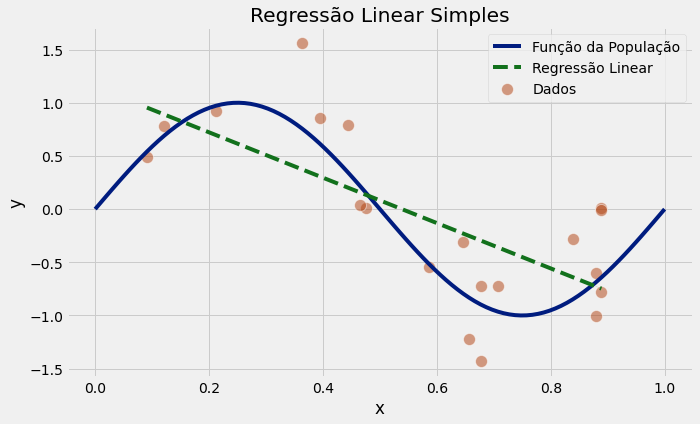

In [ ]:
fig,ax = plt.subplots(figsize = (10,6))
sns.lineplot(x = x_real, y= y_real, ax = ax,  color=paleta[0], linestyle='-', marker='', label='Função da População')
sns.scatterplot(data = data, x = 'x', y= 'y', marker = 'o', c = [paleta[1]], label = "Dados", alpha = 0.5)
sns.lineplot(x = x.ravel(), y= yhat, ax = ax,  color=paleta[2], label = "Regressão Linear", linestyle = "--")
ax.set_title("Regressão Linear Simples");

# Regressão Polinomial

In [ ]:
#bias já vem da LinearRegression
x_poly = PolynomialFeatures(degree = 20, include_bias = False).fit_transform(x)

poly_reg = LinearRegression()
poly_reg.fit(x_poly, y)

yhat_poly = poly_reg.predict(x_poly)
mean_squared_error(y, yhat_poly)

0.03701359853563848

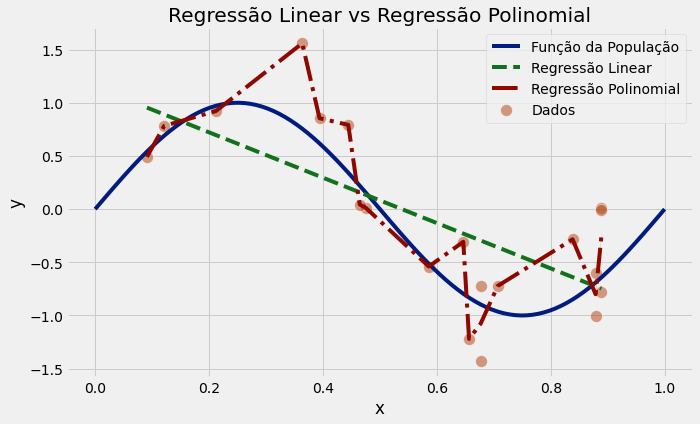

In [ ]:
fig,ax = plt.subplots(figsize = (10,6))
sns.lineplot(x = x_real, y= y_real, ax = ax, color=paleta[0], linestyle='-', marker='', label='Função da População')
sns.scatterplot(data = data, x = 'x', y= 'y', marker = 'o', c = [paleta[1]], label = "Dados", alpha = 0.5)
sns.lineplot(x = x.ravel(), y= yhat, ax = ax, color=paleta[2], label = "Regressão Linear", linestyle = "--");
sns.lineplot(x = x.ravel(), y= yhat_poly, ax = ax, ls = '-.', color=paleta[3], label = "Regressão Polinomial")
ax.set_title("Regressão Linear vs Regressão Polinomial");

# Regressão Ridge

In [ ]:
#Tunning do alpha com leave-one-out cross validation (cv = None, apenas porque são poucos dados).
ridge = RidgeCV(alphas = np.array([0.01,0.1,1,10,100]), cv = None, scoring = 'neg_mean_squared_error')
ridge.fit(x_poly, y)

yhat_ridge = ridge.predict(x_poly)

mean_squared_error(y, yhat_ridge), ridge.alpha_

(0.16856800494049648, 0.01)

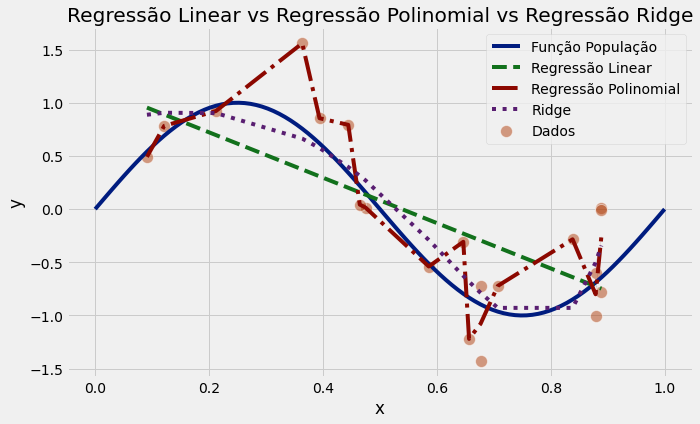

In [ ]:
fig,ax = plt.subplots(figsize = (10,6))
sns.lineplot(x = x_real, y= y_real, ax = ax, color=paleta[0], linestyle='-', marker='', label='Função População')
sns.scatterplot(data = data, x = 'x', y= 'y', marker = 'o', c = [paleta[1]], label = "Dados", alpha = 0.5)
sns.lineplot(x = x.ravel(), y= yhat, ax = ax, color=paleta[2], label = "Regressão Linear", linestyle = "--");
sns.lineplot(x = x.ravel(), y= yhat_poly, ax = ax, ls = '-.', color=paleta[3], label = "Regressão Polinomial");
sns.lineplot(x = x.ravel(), y= yhat_ridge.ravel(), ax = ax, ls = ":", color = paleta[4], label = "Ridge")
ax.set_title("Regressão Linear vs Regressão Polinomial vs Regressão Ridge");

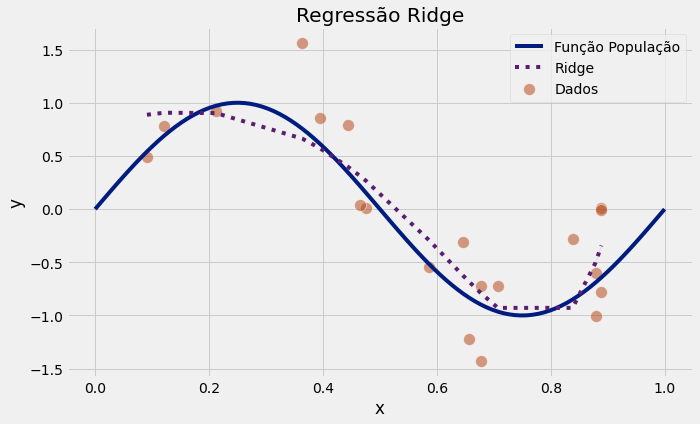

In [ ]:
fig,ax = plt.subplots(figsize = (10,6))
sns.lineplot(x = x_real, y= y_real, ax = ax, color=paleta[0], linestyle='-', marker='', label='Função População')
sns.scatterplot(data = data, x = 'x', y= 'y', marker = 'o', c = [paleta[1]], label = "Dados", alpha = 0.5)
#sns.lineplot(x = x.ravel(), y= yhat, ax = ax, color=paleta[2], label = "Regressão Linear", linestyle = "--");
#sns.lineplot(x = x.ravel(), y= yhat_poly, ax = ax, ls = '-.', color=paleta[3], label = "Regressão Polinomial");
sns.lineplot(x = x.ravel(), y= yhat_ridge.ravel(), ax = ax, ls = ":", color = paleta[4], label = "Ridge")
ax.set_title("Regressão Ridge");

Erros e Coeficientes

In [ ]:
mse = pd.DataFrame({'mse': [mean_squared_error(y, yhat),mean_squared_error(y, yhat_poly), mean_squared_error(y, yhat_ridge)]},
             index = ['Linear Regression', 'Poly Regression', 'Ridge regression'])

In [ ]:
mse

,mse
Linear Regression,0.322384
Poly Regression,0.037014
Ridge regression,0.168568


In [ ]:
coef = pd.DataFrame({'Poly Regression': poly_reg.coef_,
                     'Ridge Regression': ridge.coef_})

coef.head()

,Poly Regression,Ridge Regression
0,43235095.43795,1.54334
1,-761202784.39266,-3.80146
2,7569520539.71657,-3.32816
3,-47387320310.04510,-1.34844
4,195651590011.07812,0.29397


In [ ]:
coef.describe()

,Poly Regression,Ridge Regression
count,20.00000,20.00000
mean,297787.38723,0.14135
std,574413959701.21143,1.50208
min,-843065940026.56665,-3.80146
25%,-321169196357.06757,-0.17938
50%,-358983844.47735,0.29919
75%,218328440345.08481,1.26712
max,973646045061.91064,1.70698
